<a href="https://colab.research.google.com/github/egioia92/Google-Collab-Repository/blob/main/Binary_Logistic_Regression_Case_Study_Marketing_Campaign_Response_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Marketing Campaign Response Model

##Background
A large skin-clinic offers a variety of products and services to customers. A marketing campaign was launched for introducing a new product.

##Data
The data shows response to the marketing campaign alongwith demographic and transaction data of customers.

##Objective
The objective is to identify factors driving response to the marketing campaign.

( We want to understand if customers are responding succesfully to the marketing campaign and what are the variables contributing to its success )

###Import datasets and create masterdata

In [65]:
purchase_data1<-read.csv("/content/Purchase Data 1.csv",header=T)
purchase_data2<-read.csv("/content/Purchase Data 2.csv",header=T)
response_data<-read.csv("/content/Response Data.csv",header=T)

str(purchase_data1)
str(purchase_data2)
str(response_data)

'data.frame':	6990 obs. of  4 variables:
 $ Custid    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Pre_Month : int  2 1 1 2 1 2 2 2 2 1 ...
 $ N_Products: int  15 22 17 18 31 28 12 21 30 32 ...
 $ N_Service : int  24 29 21 22 35 31 26 24 32 23 ...
'data.frame':	6990 obs. of  4 variables:
 $ Custid   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ BillAmt_1: num  12.34 18.65 7.22 6.15 20.64 ...
 $ BillAmt_2: num  13.26 2.12 3.31 2.95 2.67 ...
 $ BillAmt_3: num  5.88 5.13 3.65 2.34 4.07 ...
'data.frame':	6990 obs. of  5 variables:
 $ Custid  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age     : int  2 2 1 2 2 1 2 1 2 2 ...
 $ Gender  : int  1 2 1 1 2 2 1 2 1 1 ...
 $ MS      : int  2 1 2 1 1 1 2 1 2 2 ...
 $ Response: int  1 0 0 0 0 0 0 0 0 0 ...


### Merging the datasets

This code performs a series of left merges on a list of data frames (`response_data`, `purchase_data1`, and `purchase_data2`) based on a common key column named `Custid`. Here’s a step-by-step breakdown of what the code does:

1. **`list(response_data, purchase_data1, purchase_data2)`**:
    - This creates a list containing three data frames: `response_data`, `purchase_data1`, and `purchase_data2`.

2. **`Reduce(function(df1, df2) merge(df1, df2, by = "Custid", all.x = TRUE), ...)`**:
    - `Reduce` is a function that applies a binary function (in this case, the `merge` function) cumulatively to the elements of a list, from left to right, reducing the list to a single output.
    - `function(df1, df2) merge(df1, df2, by = Cust, all.x = TRUE)` is an anonymous function (a function without a name) that takes two arguments, `df1` and `df2`, and merges them using the `merge` function.
    - `merge(df1, df2, by = Cust, all.x = TRUE)` performs a left join (because of `all.x = TRUE`), meaning all rows from `df1` are kept, and only matching rows from `df2` are included. If there are no matches, the result will have `NA` for columns from `df2`.

3. **Applying `Reduce`**:
    - The `Reduce` function starts with the first two data frames in the list (`response_data` and `purchase_data1`), merges them, and then takes the result and merges it with the next data frame (`purchase_data2`).
    - This process continues until all data frames in the list are merged into a single data frame.

4. **`masterdata <- ...`**:
    - The final result of the `Reduce` operation is assigned to the variable `masterdata`.

### Summary:

- **Purpose**: The code performs sequential left joins of multiple data frames based on the `Custid` column.
- **Result**: `masterdata` contains all the rows from `response_data` and includes the corresponding rows from `purchase_data1` and `purchase_data2` where matches are found on `Custid`. If no match is found in the subsequent data frames, the resulting columns will contain `NA`.


In [56]:
# merging the datasets using the reduce function in the dplyr library
library(dplyr)

masterdata<-Reduce( function(df1,df2) merge(df1,df2, by = "Custid", all.x = TRUE), list(response_data,purchase_data1,purchase_data2) )
head(masterdata)

# Another way to do it (step by step)
#masterdata<-full_join(response_data,purchase_data1,by="Custid")
#masterdata<-full_join(masterdata,purchase_data2,by="Custid")

,Custid,Age,Gender,MS,Response,Pre_Month,N_Products,N_Service,BillAmt_1,BillAmt_2,BillAmt_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,2,1,2,1,2,15,24,12.34,13.26,5.88
2,2,2,2,1,0,1,22,29,18.65,2.12,5.13
3,3,1,1,2,0,1,17,21,7.22,3.31,3.65
4,4,2,1,1,0,2,18,22,6.15,2.95,2.34
5,5,2,2,1,0,1,31,35,20.64,2.67,4.07
6,6,1,2,1,0,2,28,31,12.44,3.06,2.57


###Convert numerically coded categorical variables into “factors”

This line of code converts the `Age` column in the `masterdata` data frame from its current data type (likely numeric or integer) to a factor (categorical variable). Here's a detailed explanation of what this code does and why it might be used:

### Code Explanation:
```r
masterdata$Age <- as.factor(masterdata$Age)
```

1. **`masterdata$Age`**:
    - Accesses the `Age` column in the `masterdata` data frame.

2. **`as.factor(masterdata$Age)`**:
    - The `as.factor` function converts the `Age` column to a factor. A factor in R is used to represent categorical data and can store both integer values and their corresponding labels (levels).

3. **Assignment**:
    - The converted factor is then assigned back to the `Age` column in the `masterdata` data frame.

### Why Use This Code:
1. **Categorical Analysis**:
    - If `Age` represents categories (such as age groups) rather than continuous numeric values, converting it to a factor allows for appropriate statistical analysis and visualization. For example, age ranges like "0-18", "19-35", "36-50", etc., are categorical and should be treated as factors.

2. **Modeling**:
    - In many statistical models and machine learning algorithms, categorical variables need to be encoded as factors to be correctly interpreted by the model. This helps in understanding the impact of different categories on the outcome variable.

3. **Memory Efficiency**:
    - Factors can be more memory efficient for storing categorical data compared to storing them as characters or integers, especially when there are many repeated values.

4. **Data Integrity**:
    - Converting `Age` to a factor can prevent incorrect numerical operations (like mean or sum) that do not make sense for categorical data.

In [9]:
# converting all categorical variables to factor
# ( The integer that represents the categorarigal variables are there to represent a category)
masterdata$Age<-as.factor(masterdata$Age)
masterdata$Gender<-as.factor(masterdata$Gender)
masterdata$MS<-as.factor(masterdata$MS)
masterdata$Pre_Month<-as.factor(masterdata$Pre_Month)



In [66]:
# Response is our dependent variable and it is categorical
head(masterdata)

,Custid,Age,Gender,MS,Response,Pre_Month,N_Products,N_Service,BillAmt_1,BillAmt_2,BillAmt_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,2,1,2,1,2,15,24,12.34,13.26,5.88
2,2,2,2,1,0,1,22,29,18.65,2.12,5.13
3,3,1,1,2,0,1,17,21,7.22,3.31,3.65
4,4,2,1,1,0,2,18,22,6.15,2.95,2.34
5,5,2,2,1,0,1,31,35,20.64,2.67,4.07
6,6,1,2,1,0,2,28,31,12.44,3.06,2.57


###Check Campain response rate

The CrossTable function from the gmodels package in R generates a contingency table, which is a useful tool for summarizing the frequency distribution of one or more categorical variables.

`CrossTable(masterdata$Response)` creates a cross-tabulation of the `Response` variable, displaying the frequency counts and percentages of each unique value in the `Response` column.

### Output:
- The output will be a detailed table showing:
    - The frequency (count) of each category in the `Response` column.
    - The overall percentage of each category ( count of each category diveded by the total count)

### Why Use This Code:
1. **Descriptive Statistics**:
    - Provides a quick summary of the distribution of responses. This is useful for understanding how many observations fall into each category of the `Response` variable.

2. **Data Exploration**:
    - Helps in the initial exploration of data to identify any imbalances or patterns in the categorical data.

3. **Preparation for Analysis**:
    - Useful in preparing for more complex analyses, such as chi-square tests, to determine if there are significant differences between categories.


In [25]:
install.packages('gmodels', dependencies = TRUE, repos='http://cran.rstudio.com/')

library(gmodels)
CrossTable(masterdata$Response)

# The second number is the first number divided by the total
# We can see that the marketing campain did not go very well let's understand why


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  6990 

 
          |         0 |         1 | 
          |-----------|-----------|
          |      6065 |       925 | 
          |     0.868 |     0.132 | 
          |-----------|-----------|



 


###Alternatevely: Visualize Campaign Response Rate

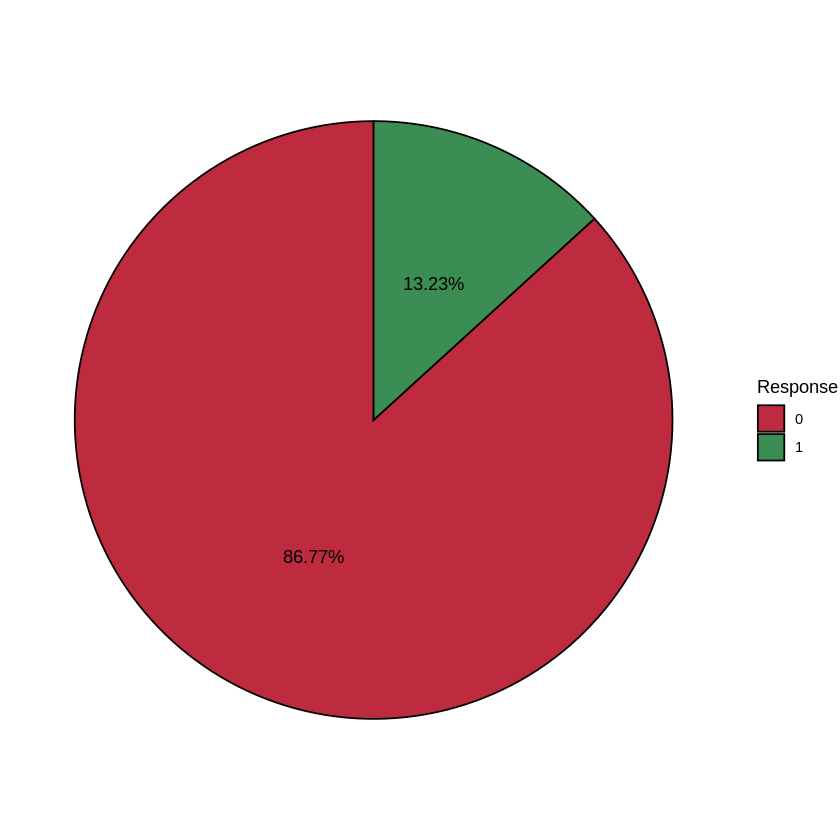

In [57]:
library(ggplot2)

response<-data.frame(table(masterdata$Response))
names(response)<-c("Response","Count")
response$Perc<-paste(round((response$Count/sum(response$Count))*100,2),"%",sep = "")

ggplot(response, aes(x = "", y = Count, fill = Response)) +
  geom_col(color = "black") +
  geom_text(aes(label = Perc),
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("#BE2A3E", "#3C8D53"))+
  theme_void()

### Study the independent variables wrt the dependent variable

Table of summary statistics for bill ampunt 1,2,3 by aggragate and dplyr.
We want to see how bill amount affects the response

In [14]:
f <- function(x) {
    c(count = length(x),
    mean = mean(x),
    median = median(x),
    sd = sd(x))
}

summary_stats_BillAmt_1 <- aggregate(BillAmt_1 ~ Response, data=masterdata, FUN=f)
summary_stats_BillAmt_1

# Comment: Higher bill amounts in last 2 transactions are observed for customers with positive response

Response,BillAmt_1
<int>,"<dbl[,4]>"
0,"6065, 12.34204, 10.77, 6.940059"
1,"925, 15.47364, 15.21, 6.677068"


In [15]:
library(dplyr)
masterdata %>%
  group_by(Response) %>%
  summarise(n=length(BillAmt_1),
    mean = mean(BillAmt_1),
    median = median(BillAmt_1),
    sd = sd(BillAmt_1)) %>%
  as.data.frame()

# Comment: Higher bill amounts in last 2 transactions are observed for customers with positive response

Response,n,mean,median,sd
<int>,<int>,<dbl>,<dbl>,<dbl>
0,6065,12.34204,10.77,6.940059
1,925,15.47364,15.21,6.677068


In [16]:
# Do the same for BillAmt_2, BillAmt_3

### Box plot of N_Products and N_Service by response

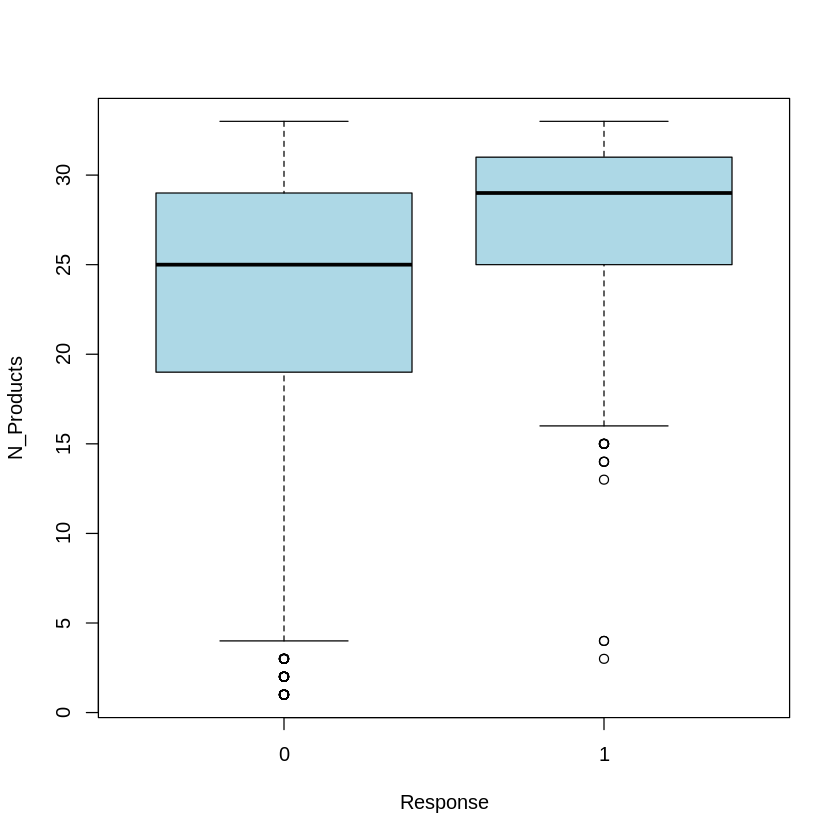

In [19]:
boxplot(N_Products~ Response, data = masterdata, col = "lightblue")
# Customers that bought in the last year have an higher rate of response to the campaign
#outliers are negligible

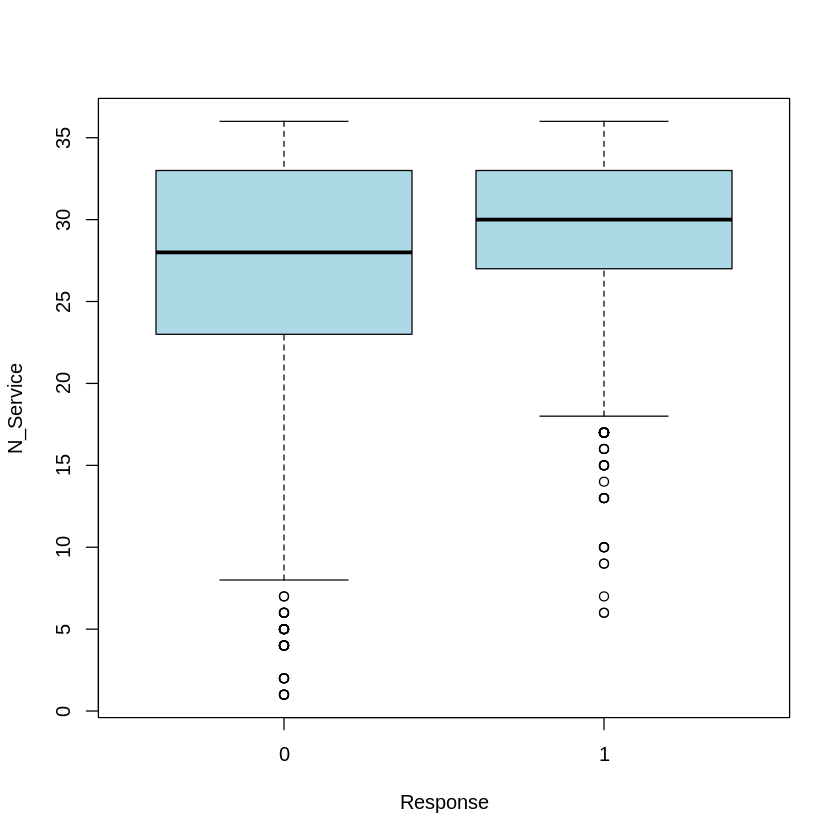

In [21]:
boxplot(N_Service ~ Response, data = masterdata, col = "lightblue")
#higher products and services are purchased by customers with positive response

#outliers are negligible

###Crosstable of Gender by Response

We can use a simple crosstable because gender is a categorical variable
The `CrossTable` function from the `gmodels` package creates a contingency table that displays the relationship between the `Gender` and `Response` variables in the `masterdata` data frame. Let's break down what this code does:

1. **`masterdata$Gender` and `masterdata$Response`**:
    - These are the two categorical variables being compared. `Gender` is typically the predictor or row variable, and `Response` is the outcome or column variable.

2. **`prop.r = TRUE`**:
    - This argument specifies that the row proportions (percentages of the total in each row) should be included in the output. It shows the proportion of responses for each gender.

3. **`prop.c = FALSE`**:
    - This argument specifies that the column proportions (percentages of the total in each column) should not be included in the output.

### Output:
The output of this function call is a contingency table that includes:
- **Frequency counts**: The number of occurrences for each combination of `Gender` and `Response`.
- **Row proportions**: The proportion of each response within each gender (because `prop.r = TRUE`).
- **Column proportions**: These are omitted because `prop.c = FALSE`.
- **Overall proportions**: The proportion of the total for each cell, if provided by default.



In [24]:
library(gmodels)
CrossTable(masterdata$Gender, masterdata$Response, prop.r = TRUE, prop.c = F)
#We can see that 50% of the response comes from females and 50% from males

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘caTools’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘gdata’, ‘gplots’, ‘gtools’, ‘lme4’





 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  6990 

 
                  | masterdata$Gender 
masterdata$Gender |         1 |         2 | Row Total | 
------------------|-----------|-----------|-----------|
                1 |      3502 |         0 |      3502 | 
                  |  1740.507 |  1747.493 |           | 
                  |     1.000 |     0.000 |     0.501 | 
                  |     0.501 |     0.000 |           | 
------------------|-----------|-----------|-----------|
                2 |         0 |      3488 |      3488 | 
                  |  1747.493 |  1754.507 |           | 
                  |     0.000 |     1.000 |     0.499 | 
                  |     0.000 |     0.499 |           | 
------------------|-----------|-----------|-----------|
     Column Total |      3502 |      3488 |      6

###Develop Campaign Response Model using Binary Logistic Regression


####Split original data into training and testing data sets

In [27]:
install.packages('caret', dependencies = TRUE, repos='http://cran.rstudio.com/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘TH.data’, ‘profileModel’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘brglm’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’, ‘randomForest’, ‘RANN’, ‘spls’, ‘subs

In [28]:
#we are gong to convert response as a factor because is a categorical variable
#note that we are not using any seed so the values will be different alla the taime we run this cell

library(caret)
masterdata$Response<-as.factor(masterdata$Response)
# using the function create data partition
index<-createDataPartition(masterdata$Response,p=0.7,list=FALSE)
traindata<-masterdata[index,]
testdata<-masterdata[-index,]

Loading required package: ggplot2

Loading required package: lattice



####Binary Logistic Regression using glm function

In [29]:
blr_model<-glm(Response~Age+Gender+MS+Pre_Month+N_Products+N_Service+BillAmt_1+BillAmt_2+BillAmt_3,data=traindata,family = binomial)

####Display parameter estimates with other model statistics

In [30]:
summary(blr_model)
# Age is estimate to be negative meaning that the older the less the response


Call:
glm(formula = Response ~ Age + Gender + MS + Pre_Month + N_Products + 
    N_Service + BillAmt_1 + BillAmt_2 + BillAmt_3, family = binomial, 
    data = traindata)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.012321   0.406754 -19.698  < 2e-16 ***
Age2        -0.066148   0.108912  -0.607 0.543616    
Age3         0.085290   0.107611   0.793 0.428024    
Gender2      0.076704   0.088546   0.866 0.386349    
MS2         -0.091601   0.088511  -1.035 0.300707    
Pre_Month2  -0.017997   0.088434  -0.204 0.838733    
N_Products   0.150746   0.010623  14.191  < 2e-16 ***
N_Service    0.040984   0.007983   5.134 2.84e-07 ***
BillAmt_1    0.026505   0.007248   3.657 0.000255 ***
BillAmt_2    0.197928   0.024742   8.000 1.25e-15 ***
BillAmt_3    0.018535   0.018897   0.981 0.326663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3826.5  on 4893  degr

Comment: “Age”,“Gender”,“MS”,“Pre_Month” and “BillAmt_3” are the insignificant variables.
Rerun the model after removing the insignificant variables

####Rerun the model after removing the insignificant variables

In [33]:
blr_model<-glm(Response~N_Products+N_Service+BillAmt_1+BillAmt_2,data=traindata,family = binomial)
summary(blr_model)


Call:
glm(formula = Response ~ N_Products + N_Service + BillAmt_1 + 
    BillAmt_2, family = binomial, data = traindata)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.920685   0.381311 -20.772  < 2e-16 ***
N_Products   0.148187   0.010273  14.425  < 2e-16 ***
N_Service    0.039949   0.007898   5.058 4.23e-07 ***
BillAmt_1    0.029552   0.006605   4.474 7.67e-06 ***
BillAmt_2    0.206806   0.023141   8.937  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3826.5  on 4893  degrees of freedom
Residual deviance: 3402.3  on 4889  degrees of freedom
AIC: 3412.3

Number of Fisher Scoring iterations: 6


Comment: The 4 significant purchase related variables have positive regression coefficients. Higher values are associated with positive campaign response.

####Check for multicollinearity using vif function

In [67]:
install.packages('car', dependencies = TRUE, repos='http://cran.rstudio.com/')
library(car)
vif(blr_model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



N_Products  N_Service  BillAmt_1  BillAmt_2 
  1.409396   1.093167   1.269103   1.753654

Even if is not required we are checking multicoll

Comment: It is observed that no variable has high vif
Hence the problem of multicollinearity does not exist

####Evaluate model performance by ROC Curve using ROCR package (Training Set)

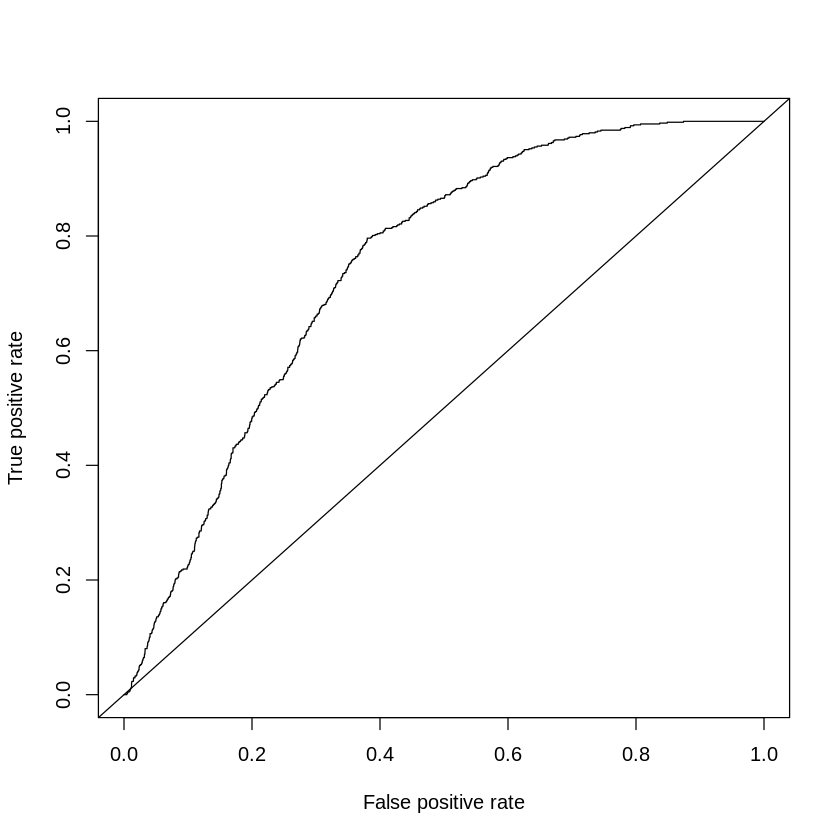

In [36]:
library(ROCR)
traindata$predprob<-fitted(blr_model)
predtrain<-prediction(traindata$predprob,traindata$Response)
perftrain<-performance(predtrain,"tpr","fpr")
plot(perftrain)
abline(0,1)


#we can see that the model is not performing so well from the plot because is looking a bit flat


####Evaluate model performance by ROC Curve using ROCR package (Testing Set)

Let's break down each part of the code to understand what it does and the meaning of the `type` parameter in the `predict` function.

### Code Explanation:

1. **Predicting Probabilities:**
   ```r
   testdata$predprob <- predict(blr_model, testdata, type = 'response')
   ```
   - **`blr_model`**: This is your fitted logistic regression model.
   - **`testdata`**: This is the data frame containing the test dataset for which predictions are being made.
   - **`predict` function**: This function is used to make predictions based on the model.
   - **`type = 'response'`**: This argument specifies that the output should be predicted probabilities of the response variable being 1 (or the positive class). In the context of logistic regression, this means the probabilities are obtained after applying the logistic function to the linear predictors.

2. **Creating Prediction Object:**
   ```r
   predtest <- prediction(testdata$predprob, testdata$Response)
   ```
   - **`prediction` function**: From the `ROCR` package, this function creates a prediction object, which is required for performance evaluation.
   - **`testdata$predprob`**: The predicted probabilities obtained from the `predict` function.
   - **`testdata$Response`**: The actual response values (ground truth) from the test dataset.

3. **Performance Evaluation:**
   ```r
   perftest <- performance(predtest, "tpr", "fpr")
   ```
   - **`performance` function**: Also from the `ROCR` package, this function evaluates the performance of the predictions.
   - **`predtest`**: The prediction object created in the previous step.
   - **`"tpr"` and `"fpr"`**: These arguments specify that the True Positive Rate (TPR, also known as sensitivity or recall) and the False Positive Rate (FPR) should be computed, respectively. These metrics are used to plot the ROC curve.

4. **Plotting the ROC Curve:**
   ```r
   plot(perftest)
   abline(0, 1)
   ```
   - **`plot(perftest)`**: This plots the ROC curve using the TPR and FPR values.
   - **`abline(0, 1)`**: Adds a diagonal line to the plot. This line represents the performance of a random classifier. If the ROC curve is above this line, it indicates that the model performs better than random guessing.

### Summary:

- **`type = 'response'`** in the `predict` function indicates that the output should be the predicted probabilities for the positive class.
- The ROC curve is then plotted to evaluate the model's performance in distinguishing between the positive and negative classes.


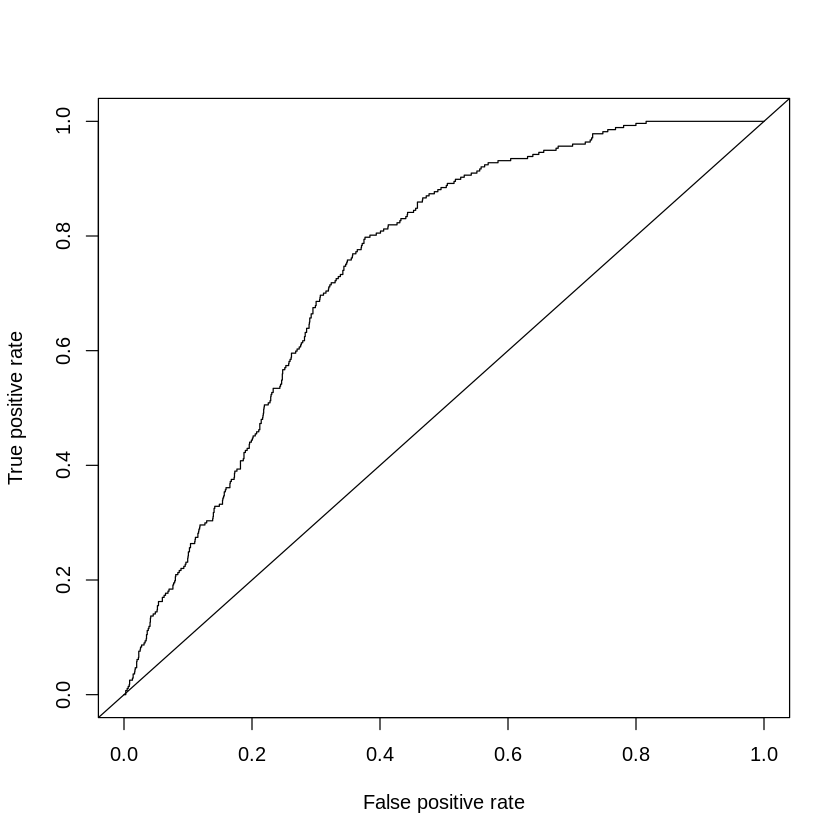

In [40]:
testdata$predprob<-predict(blr_model,testdata,type='response')
predtest<-prediction(testdata$predprob,testdata$Response)
perftest<-performance(predtest,"tpr","fpr")
plot(perftest)
abline(0,1)

####Checking area under the ROC curve

In [38]:
#Checking area under the ROC curve (they are comparable)
auctrain<-performance(predtrain,"auc")
auctrain@y.values
auctest<-performance(predtest,"auc")
auctest@y.values


[[1]]
[1] 0.7459472

[[1]]
[1] 0.7463557

### Model Validation: Holdout Method using confusionMatrix


####Finding optimum threshold for classification by maximizing sensitivity + specificity

Let's break down this code step by step to understand what it does:

1. **`sstrain <- performance(predtrain, "sens", "spec")`**:
    - This line uses the `performance` function, likely from the `ROCR` package in R, which is commonly used for evaluating the performance of classification models.
    - `predtrain` is the prediction object created by using the `prediction` function from the `ROCR` package, containing the predicted probabilities and true labels.
    - The arguments `"sens"` and `"spec"` specify that the performance measure should include sensitivity (true positive rate) and specificity (true negative rate).

2. **`best_threshold <- sstrain@alpha.values[[1]][which.max(sstrain@x.values[[1]]+sstrain@y.values[[1]])]`**:
    - This line identifies the best threshold for classification based on the performance metrics.
    - `sstrain@alpha.values[[1]]` contains the threshold values.
    - `sstrain@x.values[[1]]` and `sstrain@y.values[[1]]` contain the sensitivity and specificity values, respectively.
    - `which.max(sstrain@x.values[[1]] + sstrain@y.values[[1]])` computes the index of the threshold that maximizes the sum of sensitivity and specificity. This method attempts to find a balance between true positive rate and true negative rate.
    - `sstrain@alpha.values[[1]][which.max(...)]` retrieves the threshold value at this optimal index.

3. **`best_threshold`**:
    - This variable stores the optimal threshold value that maximizes the sum of sensitivity and specificity.

### Explanation in Context:

- The `performance` function evaluates the sensitivity and specificity of the model across different threshold values.
- The code then finds the threshold where the sum of sensitivity and specificity is maximized, aiming to balance the true positive and true negative rates.
- The resulting `best_threshold` is the threshold value at which the model performs optimally according to this criterion.


In [41]:
sstrain <- performance(predtrain, "sens", "spec") # first preparing the sens and spec
best_threshold <- sstrain@alpha.values[[1]][which.max(sstrain@x.values[[1]]+sstrain@y.values[[1]])] #then we ta
best_threshold


[1] 0.1280152

####Confusion matrix for train and test data

In [42]:
# Train Data
traindata$predY<-as.factor(ifelse(traindata$predprob>best_threshold,1,0))
confusionMatrix(traindata$predY,traindata$Response,positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2632  133
         1 1614  515
                                          
               Accuracy : 0.643           
                 95% CI : (0.6294, 0.6565)
    No Information Rate : 0.8676          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2106          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7948          
            Specificity : 0.6199          
         Pos Pred Value : 0.2419          
         Neg Pred Value : 0.9519          
             Prevalence : 0.1324          
         Detection Rate : 0.1052          
   Detection Prevalence : 0.4350          
      Balanced Accuracy : 0.7073          
                                          
       'Positive' Class : 1               
                        

In [68]:
# Test Data
testdata$predY<-as.factor(ifelse(testdata$predprob>best_threshold,1,0))
confusionMatrix(testdata$predY,testdata$Response,positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1159   63
         1  660  214
                                          
               Accuracy : 0.6551          
                 95% CI : (0.6343, 0.6754)
    No Information Rate : 0.8678          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2141          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7726          
            Specificity : 0.6372          
         Pos Pred Value : 0.2449          
         Neg Pred Value : 0.9484          
             Prevalence : 0.1322          
         Detection Rate : 0.1021          
   Detection Prevalence : 0.4170          
      Balanced Accuracy : 0.7049          
                                          
       'Positive' Class : 1               
                        